# House prices forecasting

This notebook is my qualification work in training courses.
The goal of this copetition is to predict the sale price of a home. This notebook tries out some machine learning models to solve this task. My work includes:

* data description
* missing values filling
* descriptive statistics
* one-hot encoding
* feature selection
* model fitting
* models quality assesment
* submission

Let's start!

## 1. Importing necessary libraries and datasets

Libraries:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

Datasets:

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 2. Dataset description

Dataset size: train has 1460 rows and 81 columns, test has 1459 rows and 80 columns

In [5]:
train.shape, test.shape

((1460, 81), (1459, 80))

Drop duplicates (if exists):

In [6]:
train = train.drop_duplicates()
test = test.drop_duplicates()

There were no duplicates:

In [7]:
train.shape, test.shape

((1460, 81), (1459, 80))

Display the first five rows in train dataset. The table is large so divide it into several:

In [8]:
train.iloc[:,:20].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000


In [9]:
train.iloc[:,20:40].head()

,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating
0,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA
1,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA
2,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA
3,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA
4,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA


In [10]:
train.iloc[:,40:60].head()

,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt
0,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0
1,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0
2,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0
3,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0
4,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0


In [11]:
train.iloc[:,60:70].head()

,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch
0,RFn,2,548,TA,TA,Y,0,61,0,0
1,RFn,2,460,TA,TA,Y,298,0,0,0
2,RFn,2,608,TA,TA,Y,0,42,0,0
3,Unf,3,642,TA,TA,Y,0,35,272,0
4,RFn,3,836,TA,TA,Y,192,84,0,0


In [12]:
train.iloc[:,70:81].head()

,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The first column is ID, the last - target value, the remaining columns is are the parameters of houses. 38 columns are numeric variables and 43 are categorial variables. Some data is missing.

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Test dataset has the same parameters except target value. Also there is missing data.

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

## 3. Missing values filling

### Train dataset

Copy the dataset to perform manipulations not with the original one:

In [15]:
train_w = train.copy()

#### MasVnrType и MasVnrArea variables.

The absence of certain parameters may indicate that the object does not have this attribute.
MasVnrType и MasVnrArea - the missing values of each column are in the same rows:

In [16]:
train_w[train_w['MasVnrType'].isnull()].iloc[:, 25:27]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


MasVnrType fill with None, а MasVnrArea fill with 0:

In [17]:
train_w['MasVnrType'] = train_w['MasVnrType'].fillna('None')
train_w['MasVnrArea'] = train_w['MasVnrArea'].fillna(0)

#### Alley variable.

There are a lot of missing values and no object has the "No alley access" value. Let's assume that missing values are a sign of absence. 

In [18]:
train_w['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

Fill the missing values with the value "No alley access": 

In [19]:
train_w['Alley'] = train_w['Alley'].fillna('NA')

#### GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond variables.

Let's count the number of objects that have a garage area equal to 0. Their number matches the number of missing values
in other fields describing garages:

In [20]:
train_w[train_w['GarageArea'] == 0]['GarageArea'].count()

81

The missing parameters Garage Type, GarageYrBlt, GarageFinish, GarageQual, and GarageCond have the values Garage Cars and GarageArea equal to 0:

In [21]:
train_w[train_w['GarageType'].isnull()].iloc[:, 58:65].head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN


Fill GarageType, GarageFinish, GarageQual и GarageCond with "NA" and GarageYrBlt with 0:

In [22]:
train_w['GarageType'] = train_w['GarageType'].fillna('NA')
train_w['GarageFinish'] = train_w['GarageFinish'].fillna('NA')
train_w['GarageQual'] = train_w['GarageQual'].fillna('NA')
train_w['GarageCond'] = train_w['GarageCond'].fillna('NA')
train_w['GarageYrBlt'] = train_w['GarageYrBlt'].fillna(0)

#### FireplaceQu variable.

The number of missing values equal to the number of houses with 0 fireplaces:

In [23]:
train_w['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [24]:
train_w['FireplaceQu'].isnull().value_counts()

False    770
True     690
Name: FireplaceQu, dtype: int64

In [25]:
train_w[train_w['FireplaceQu'].isnull()].iloc[:,56:58].head()

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN


Fill missing values with value "No Fireplace":

In [26]:
train_w['FireplaceQu'] = train_w['FireplaceQu'].fillna('NA')

#### PoolQC variable.

Only houses with pool area parameter has pool quality patameter:

In [27]:
train_w['PoolArea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [28]:
train_w[train_w['PoolArea'] != 0].iloc[:,71:73]

,PoolArea,PoolQC
197,512,Ex
810,648,Fa
1170,576,Gd
1182,555,Ex
1298,480,Gd
1386,519,Fa
1423,738,Gd


Fill in the missing values of the PoolQC parameter with the value "No Pool":

In [29]:
train_w['PoolQC'] = train_w['PoolQC'].fillna('NA')

#### Fence variable.

There are no sections without a fence in the dataset. Let's assume that the missing values are sections without a fence:

In [30]:
train_w['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

Fill with value "No Fence":

In [31]:
train_w['Fence'] = train_w['Fence'].fillna('NA')

#### MiscFeature variable.

Similar to the previous paragraph:

In [32]:
train_w['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [33]:
train_w['MiscFeature'] = train_w['MiscFeature'].fillna('NA')

#### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 variables

In [34]:
train_w[train_w['BsmtExposure'].isnull()].iloc[:,30:39]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0
182,NaN,NaN,NaN,NaN,0,NaN,0,0,0
259,NaN,NaN,NaN,NaN,0,NaN,0,0,0
342,NaN,NaN,NaN,NaN,0,NaN,0,0,0
362,NaN,NaN,NaN,NaN,0,NaN,0,0,0
371,NaN,NaN,NaN,NaN,0,NaN,0,0,0


In line 948 all parameters are filled in except BsmtExposure it means that the basement attribute is present. So fill BsmtExposure with mode:

In [35]:
 train_w['BsmtExposure'].mode()

0    No
dtype: object

In [36]:
train_w.iloc[948, 31] = 'No'

Other values fill with NA:

In [37]:
train_w['BsmtQual'] = train_w['BsmtQual'].fillna('NA')
train_w['BsmtCond'] = train_w['BsmtCond'].fillna('NA')
train_w['BsmtExposure'] = train_w['BsmtExposure'].fillna('NA')
train_w['BsmtFinType1'] = train_w['BsmtFinType1'].fillna('NA')
train_w['BsmtFinType2'] = train_w['BsmtFinType2'].fillna('NA')

#### LotFrontage variable

Numeric missing value fill with average:

In [38]:
train_w['LotFrontage'] = train_w['LotFrontage'].fillna(train_w['LotFrontage'].mean())

#### Electrical variable.

The last categorial variable fill with mode:

In [39]:
train_w['Electrical'].mode()

0    SBrkr
dtype: object

In [40]:
train_w['Electrical'] = train_w['Electrical'].fillna('SBrkr')

All features are filled:

In [41]:
train_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

### Converting data to the correct format

Let's check the data is stored in the correct format:

In [42]:
for i in range(len(train_w['LotFrontage'].unique())):
    if train_w['LotFrontage'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_true


In [43]:
for i in range(len(train_w['MasVnrArea'].unique())):
    if train_w['MasVnrArea'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_false


In [44]:
for i in range(len(train_w['GarageYrBlt'].unique())):
    if train_w['GarageYrBlt'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_false


GarageYrBlt and MasVnrArea values are integers, convert them to the appropriate format:

In [45]:
train_w['GarageYrBlt'] = train_w.GarageYrBlt.astype('int64')
train_w['MasVnrArea'] = train_w.MasVnrArea.astype('int64')

### Test dataset

now we will perform the same actions for the test dataset

In [46]:
test_w = test.copy()

Fill the missing values using the same logic as for training dataset

#### Alley parameter.

Most likely, the empty values are "No alley access"

In [47]:
test_w['Alley'].value_counts()

Grvl    70
Pave    37
Name: Alley, dtype: int64

In [48]:
test_w['Alley'] = test_w['Alley'].fillna('NA')

#### MSZoning parameter.

Categorial parameter, fill with mode.

In [49]:
test_w['MSZoning'].mode()

0    RL
dtype: object

In [50]:
test_w['MSZoning'] = test_w['MSZoning'].fillna('RL')

#### Utilities parameter. 

Categorial parameter, fill with mode:

In [51]:
test_w['Utilities'].mode()

0    AllPub
dtype: object

In [52]:
test_w['Utilities'] = test_w['Utilities'].fillna('AllPub')

#### Exterior1st, Exterior2nd parameters.

Categorial parameters, fill with mode:

In [53]:
test_w['Exterior1st'].mode() , test_w['Exterior2nd'].mode()

(0    VinylSd
 dtype: object, 0    VinylSd
 dtype: object)

In [54]:
test_w['Exterior1st'] = test_w['Exterior1st'].fillna('VinylSd')
test_w['Exterior2nd'] = test_w['Exterior2nd'].fillna('VinylSd')

#### MasVnrType, MasVnrArea parameters.

For row 1150, the MasVnrType parameter fill with the most popular value other than None (because the area is filled). Other rows fill with None and MasVnrArea will fill in 0.

In [55]:
test_w[test_w['MasVnrType'].isnull()].iloc[:, 25:27]

,MasVnrType,MasVnrArea
231,NaN,NaN
246,NaN,NaN
422,NaN,NaN
532,NaN,NaN
544,NaN,NaN
581,NaN,NaN
851,NaN,NaN
865,NaN,NaN
880,NaN,NaN
889,NaN,NaN


In [56]:
test_w['MasVnrType'].value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [57]:
test_w.iloc[1150, 25] = 'BrkFace'
test_w['MasVnrType'] = test_w['MasVnrType'].fillna('None')
test_w['MasVnrArea'] = test_w['MasVnrArea'].fillna(0)

#### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtS parameters.

Parameter BsmtCond in rows 580, 725 and 1064 fill with mode (because other parameters filled).

Missed BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtS parameters fill with 0 and BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 parameters fill with "No basement" if all parameters missed.

In [58]:
test_w[test_w['BsmtCond'].isnull()].iloc[:,30:39]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
125,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
133,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
269,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
318,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
354,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
387,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
388,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
396,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
397,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
398,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0


In [59]:
test_w['BsmtCond'].value_counts()

TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64

In [60]:
test_w.iloc[580, 31] = 'TA'
test_w.iloc[725, 31] = 'TA'
test_w.iloc[1064, 31] = 'TA'
test_w['BsmtFinSF1'] = test_w['BsmtFinSF1'].fillna(0)
test_w['BsmtFinSF2'] = test_w['BsmtFinSF2'].fillna(0)
test_w['BsmtUnfSF'] = test_w['BsmtUnfSF'].fillna(0)
test_w['TotalBsmtSF'] = test_w['TotalBsmtSF'].fillna(0)
test_w['BsmtQual'] = test_w['BsmtQual'].fillna('NA')
test_w['BsmtCond'] = test_w['BsmtCond'].fillna('NA')
test_w['BsmtExposure'] = test_w['BsmtExposure'].fillna('NA')
test_w['BsmtFinType1'] = test_w['BsmtFinType1'].fillna('NA')
test_w['BsmtFinType2'] = test_w['BsmtFinType2'].fillna('NA')

#### BsmtFullBath, BsmtHalfBath parameters.

These parameters are integers, fill with mode:

In [61]:
test_w[test_w['BsmtFullBath'].isnull()].iloc[:,47:49]

,BsmtFullBath,BsmtHalfBath
660,NaN,NaN
728,NaN,NaN


In [62]:
test_w['BsmtFullBath'].mode(), test_w['BsmtHalfBath'].mode()

(0    0.0
 dtype: float64, 0    0.0
 dtype: float64)

In [63]:
test_w['BsmtFullBath'] = test_w['BsmtFullBath'].fillna(0)
test_w['BsmtHalfBath'] = test_w['BsmtHalfBath'].fillna(0)

#### KitchenQual parameter.

Categorial parameter, fill with mode:

In [64]:
test_w['KitchenQual'].mode()

0    TA
dtype: object

In [65]:
test_w['KitchenQual'] = test_w['KitchenQual'].fillna('TA')

#### Functional parameter.

Categorial parameter, fill with mode:

In [66]:
test_w['Functional'].mode()

0    Typ
dtype: object

In [67]:
test_w['Functional'] = test_w['Functional'].fillna('Typ')

#### FireplaceQu parameter.

The sum of fireplaces in lines with empty FireplaceQu is 0. Fill with "No fireplace"

In [68]:
test_w['Fireplaces'].value_counts()

0    730
1    618
2    104
3      6
4      1
Name: Fireplaces, dtype: int64

In [69]:
test_w[test_w['FireplaceQu'].isnull()]['Fireplaces'].sum()

0

In [70]:
test_w['FireplaceQu'] = test_w['FireplaceQu'].fillna('NA')

#### GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond parameters.

Для строк 1116 и 666 год заполним таким же, как год постройки дома, площадь гаража - средним, остальные параметры - модой
For lines 1116 and 666, fill GarageYrBlt with the same year as the year the house was built, the garage area fill with average, and the other parameters with mode:

In [71]:
test_w[test_w['GarageCars'].isnull()].iloc[:, 58:65]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
1116,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
test_w['GarageFinish'].mode(), test_w['GarageCars'].mode(), test_w['GarageArea'].mean(), test_w['GarageQual'].mode(), test_w['GarageCond'].mode()

(0    Unf
 dtype: object, 0    2.0
 dtype: float64, 472.76886145404666, 0    TA
 dtype: object, 0    TA
 dtype: object)

In [73]:
test_w[test_w['GarageYrBlt'].isnull()].iloc[:, 58:65]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
53,NaN,NaN,NaN,0.0,0.0,NaN,NaN
71,NaN,NaN,NaN,0.0,0.0,NaN,NaN
79,NaN,NaN,NaN,0.0,0.0,NaN,NaN
92,NaN,NaN,NaN,0.0,0.0,NaN,NaN
96,NaN,NaN,NaN,0.0,0.0,NaN,NaN
98,NaN,NaN,NaN,0.0,0.0,NaN,NaN
100,NaN,NaN,NaN,0.0,0.0,NaN,NaN
130,NaN,NaN,NaN,0.0,0.0,NaN,NaN
133,NaN,NaN,NaN,0.0,0.0,NaN,NaN
134,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [74]:
test_w.iloc[1116, 59] = int('1923')
test_w.iloc[1116, 60] = 'Unf'
test_w.iloc[1116, 61] = int('2')
test_w.iloc[1116, 62] = float('472.76')
test_w.iloc[1116, 63] = 'TA'
test_w.iloc[1116, 64] = 'TA'
test_w.iloc[666, 59] = int('1910')
test_w.iloc[666, 60] = 'Unf'
test_w.iloc[666, 63] = 'TA'
test_w.iloc[666, 64] = 'TA'
test_w['GarageType'] = test_w['GarageType'].fillna('NA')
test_w['GarageFinish'] = test_w['GarageFinish'].fillna('NA')
test_w['GarageQual'] = test_w['GarageQual'].fillna('NA')
test_w['GarageCond'] = test_w['GarageCond'].fillna('NA')
test_w['GarageYrBlt'] = test_w['GarageYrBlt'].fillna(0)

#### PoolQC parameter.

Fill in the gaps where there is an area with the mode, the rest with the value "No pool"

In [75]:
 test_w[test_w['PoolArea'] != 0].iloc[:,71:73]

,PoolArea,PoolQC
514,144,Ex
960,368,NaN
1043,444,NaN
1113,228,Ex
1139,561,NaN
1250,800,Gd


In [76]:
test_w.iloc[960, 72] = 'Ex'
test_w.iloc[1043, 72] = 'Ex'
test_w.iloc[1139, 72] = 'Ex'
test_w['PoolQC'] = test_w['PoolQC'].fillna('NA')

#### Fence parameter.

There are no houses without a fence. let's assume that the missing value is the houses without a fence and fill in the value "No Fence":

In [77]:
test_w['Fence'].value_counts()

MnPrv    172
GdPrv     59
GdWo      58
MnWw       1
Name: Fence, dtype: int64

In [78]:
test_w['Fence'] = test_w['Fence'].fillna('NA')

#### MiscFeature parameter.

Similar to the previous parameter:

In [79]:
test_w['MiscFeature'].value_counts()

Shed    46
Gar2     3
Othr     2
Name: MiscFeature, dtype: int64

In [80]:
test_w['MiscFeature'] = test_w['MiscFeature'].fillna('NA')

#### SaleType parameter.

Categorial parameter, fill with mode:

In [81]:
test_w['SaleType'].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
ConLI       4
Oth         4
Con         3
ConLw       3
Name: SaleType, dtype: int64

In [82]:
test_w['SaleType'] = test_w['SaleType'].fillna('WD')

#### LotFrontage parameter.

Numeric parameter, fill with average:

In [83]:
test_w['LotFrontage'] = test_w['LotFrontage'].fillna(test_w['LotFrontage'].mean())

All missing values are filled:

In [84]:
test_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non

### Converting data to the correct format

Let's check the data is stored in the correct format:

In [85]:
for i in range(len(test_w['LotFrontage'].unique())):
    if test_w['LotFrontage'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_true


In [86]:
for i in range(len(test_w['MasVnrArea'].unique())):
    if test_w['MasVnrArea'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_false


In [87]:
for i in range(len(test_w['BsmtFinSF1'].unique())):
    if test_w['BsmtFinSF1'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_false


In [88]:
for i in range(len(test_w['BsmtFinSF2'].unique())):
    if test_w['BsmtFinSF2'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_false


In [89]:
for i in range(len(test_w['TotalBsmtSF'].unique())):
    if test_w['TotalBsmtSF'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_false


In [90]:
for i in range(len(test_w['BsmtFullBath'].unique())):
    if test_w['BsmtFullBath'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_false


In [91]:
for i in range(len(test_w['BsmtHalfBath'].unique())):
    if test_w['BsmtHalfBath'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_false


In [92]:
for i in range(len(test_w['GarageYrBlt'].unique())):
    if test_w['GarageYrBlt'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_false


In [93]:
for i in range(len(test_w['GarageCars'].unique())):
    if test_w['GarageCars'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_false


In [94]:
for i in range(len(test_w['GarageArea'].unique())):
    if test_w['GarageArea'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_true


In [95]:
for i in range(len(test_w['BsmtUnfSF'].unique())):
    if test_w['BsmtUnfSF'].unique()[i] % 1 != 0:
        print('float_true')
        break
else:
    print('float_false')

float_false


Only LotFrontage and GarageArea has correct type. Convert other parameters to correct type:

In [96]:
test_w['MasVnrArea'] = test_w.MasVnrArea.astype('int64')
test_w['BsmtFinSF1'] = test_w.BsmtFinSF1.astype('int64')
test_w['BsmtFinSF2'] = test_w.BsmtFinSF2.astype('int64')
test_w['TotalBsmtSF'] = test_w.TotalBsmtSF.astype('int64')
test_w['BsmtFullBath'] = test_w.BsmtFullBath.astype('int64')
test_w['BsmtHalfBath'] = test_w.BsmtHalfBath.astype('int64')
test_w['GarageYrBlt'] = test_w.GarageYrBlt.astype('int64')
test_w['GarageCars'] = test_w.GarageCars.astype('int64')
test_w['BsmtUnfSF'] = test_w.BsmtUnfSF.astype('int64')

## 4. Descriptive statistics

We should pay attention to the variables MSSubClass, LotArea, MasVnrArea, BsmtFinSF2, BsmtUnfSF, 2ndFlrSF, LowQualFinSF,
BsmtFullBath, BsmtHalfBath, FullBath - they have a very large standard deviation relative to the average value

In [97]:
round(train.iloc[:,:50].describe(),1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath
count,1460.0,1460.0,1201.0,1460.0,1460.0,1460.0,1460.0,1460.0,1452.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,730.5,56.9,70.0,10516.8,6.1,5.6,1971.3,1984.9,103.7,443.6,46.5,567.2,1057.4,1162.6,347.0,5.8,1515.5,0.4,0.1,1.6
std,421.6,42.3,24.3,9981.3,1.4,1.1,30.2,20.6,181.1,456.1,161.3,441.9,438.7,386.6,436.5,48.6,525.5,0.5,0.2,0.6
min,1.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,0.0,0.0,334.0,0.0,0.0,334.0,0.0,0.0,0.0
25%,365.8,20.0,59.0,7553.5,5.0,5.0,1954.0,1967.0,0.0,0.0,0.0,223.0,795.8,882.0,0.0,0.0,1129.5,0.0,0.0,1.0
50%,730.5,50.0,69.0,9478.5,6.0,5.0,1973.0,1994.0,0.0,383.5,0.0,477.5,991.5,1087.0,0.0,0.0,1464.0,0.0,0.0,2.0
75%,1095.2,70.0,80.0,11601.5,7.0,6.0,2000.0,2004.0,166.0,712.2,0.0,808.0,1298.2,1391.2,728.0,0.0,1776.8,1.0,0.0,2.0
max,1460.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,1474.0,2336.0,6110.0,4692.0,2065.0,572.0,5642.0,3.0,2.0,3.0


Also to the variables HalfBath, Fireplaces, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal

In [98]:
round(train.iloc[:,50:].describe(),1)

,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1460.0,1460.0,1460.0,1460.0,1379.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,0.4,2.9,1.0,6.5,0.6,1978.5,1.8,473.0,94.2,46.7,22.0,3.4,15.1,2.8,43.5,6.3,2007.8,180921.2
std,0.5,0.8,0.2,1.6,0.6,24.7,0.7,213.8,125.3,66.3,61.1,29.3,55.8,40.2,496.1,2.7,1.3,79442.5
min,0.0,0.0,0.0,2.0,0.0,1900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0
25%,0.0,2.0,1.0,5.0,0.0,1961.0,1.0,334.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0
50%,0.0,3.0,1.0,6.0,1.0,1980.0,2.0,480.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,163000.0
75%,1.0,3.0,1.0,7.0,1.0,2002.0,2.0,576.0,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0
max,2.0,8.0,3.0,14.0,3.0,2010.0,4.0,1418.0,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0,755000.0


### Graphics

In [99]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,5

Consider parameters which were described above.

The area of the facing (MasVnrArea), as well as the area of the house, can have a very large spread, hence the outliers;

BsmtFinSF2-almost 1300 values = 0, so all other values are specified as outliers, but they cannot be considered as outliers;

BsmtUnfSF-a lot of houses that have a large basement area and and have not completed repairs

2ndFlrSF-not all houses have a second floor, so some of the values have an area of 0. Outliers are low.

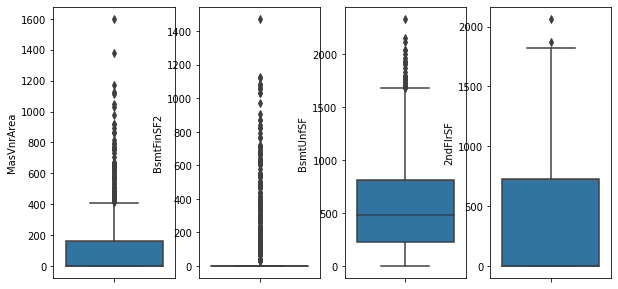

In [100]:
f, axes = plt.subplots(1, 4)
sns.boxplot(y = train_w['MasVnrArea'], ax = axes[0])
sns.boxplot(y = train_w['BsmtFinSF2'], ax = axes[1])
sns.boxplot(y = train_w['BsmtUnfSF'], ax = axes[2])
sns.boxplot(y = train_w['2ndFlrSF'], ax = axes[3])

LowQualFinSF - this feature is also not available for every house, the data is very scattered and there are a lot of outliers

WoodDeckSF - not everywhere there is a wooden terrace, while some houses have huge ones

PoolArea - similar to the WoodDeckSF

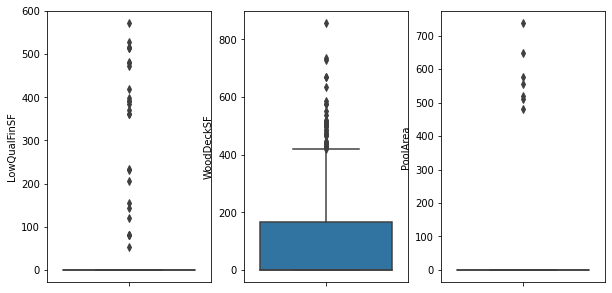

In [101]:
f, axes = plt.subplots(1, 3)
sns.boxplot(y = train_w['LowQualFinSF'], ax = axes[0])
sns.boxplot(y = train_w['WoodDeckSF'], ax = axes[1])
sns.boxplot(y = train_w['PoolArea'], ax = axes[2])

OpenPorchSF - not all houses have an open porch

EnclosedPorch -most homes don't have a covered porch

3SsnPorch - similar

ScreenPorch - similar

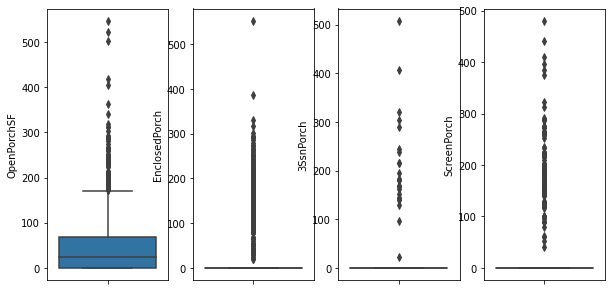

In [102]:
f, axes = plt.subplots(1, 4)
sns.boxplot(y = train_w['OpenPorchSF'], ax = axes[0])
sns.boxplot(y = train_w['EnclosedPorch'], ax = axes[1])
sns.boxplot(y = train_w['3SsnPorch'], ax = axes[2])
sns.boxplot(y = train_w['ScreenPorch'], ax = axes[3])

BsmtFullBath - minimum outliers

BsmtHalfBath - almost all values are equal to 0

Fullpath - no outliers

Half Bath - no outliers

Fireplaces - minimum outliers

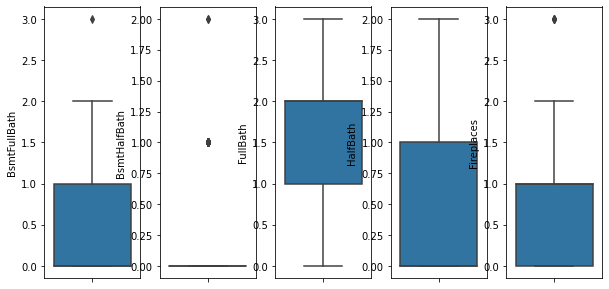

In [103]:
f, axes = plt.subplots(1, 5)
sns.boxplot(y = train_w['BsmtFullBath'], ax = axes[0])
sns.boxplot(y = train_w['BsmtHalfBath'], ax = axes[1])
sns.boxplot(y = train_w['FullBath'], ax = axes[2])
sns.boxplot(y = train_w['HalfBath'], ax = axes[3])
sns.boxplot(y = train_w['Fireplaces'], ax = axes[4])

LotArea - the area has a large spread, a lot of outliers

MiscVal - houses mostly don't have additional features

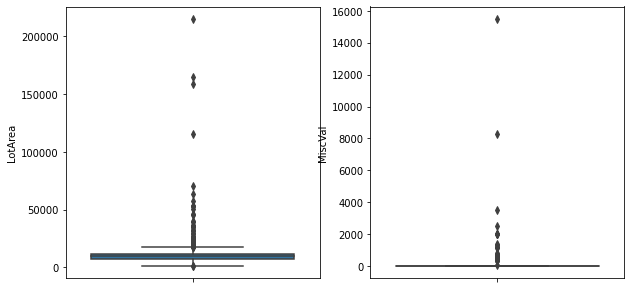

In [104]:
f, axes = plt.subplots(1, 2)
sns.boxplot(y = train_w['LotArea'], ax = axes[0])
sns.boxplot(y = train_w['MiscVal'], ax = axes[1])

Consider the target value charts:

Most houses cost almost 100 000 - 200 000. At the same time, there are more expensive houses than cheap ones

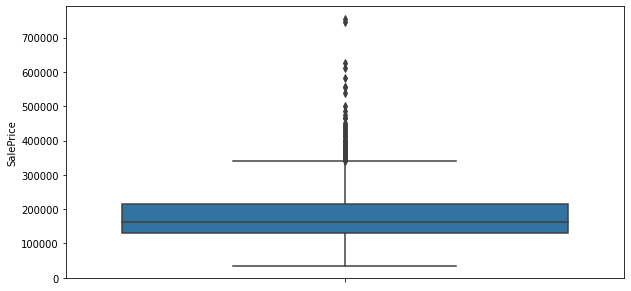

In [105]:
sns.boxplot(y = train_w['SalePrice'])

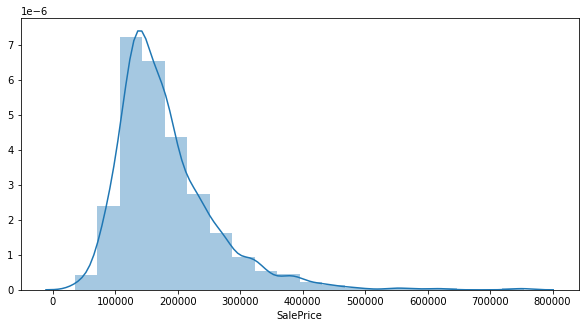

In [106]:
sns.distplot(train_w['SalePrice'], 20)

The dataset is small enough to delete rows from it. In addition, there is no certainty that it is necessary

## 5. One-Hot Encoding

Converting categorical features to numeric values

Categorial features:

In [107]:
for i in range(len(train_w.columns)):
    if type(train_w.iloc[1, i]) == str:
        print(train_w.columns[i])

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


Use get_dummies for 43 features and get 305 features for train and 285 features for test in total:

In [108]:
train_dumm = pd.get_dummies(train_w, columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', \
                                               'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', \
                                               'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', \
                                               'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', \
                                               'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', \
                                               'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', \
                                               'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', \
                                               'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', \
                                               'SaleType', 'SaleCondition'])

test_dumm = pd.get_dummies(test_w, columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', \
                                               'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', \
                                               'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', \
                                               'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', \
                                               'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', \
                                               'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', \
                                               'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', \
                                               'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', \
                                               'SaleType', 'SaleCondition'])
len(train_dumm.columns), len(test_dumm.columns)

(305, 285)

To use the algorithm with a test dataset, the number of columns must be the same. Find differences between datasets:

In [109]:
diff1 = list(set(train_dumm) - set(test_dumm))

In [110]:
diff1

['MiscFeature_TenC',
 'Heating_OthW',
 'Exterior2nd_Other',
 'Utilities_NoSeWa',
 'PoolQC_Fa',
 'Condition2_RRAe',
 'RoofMatl_ClyTile',
 'Exterior1st_Stone',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'HouseStyle_2.5Fin',
 'BsmtCond_No',
 'GarageQual_Ex',
 'Condition2_RRNn',
 'Electrical_Mix',
 'RoofMatl_Roll',
 'Exterior1st_ImStucc',
 'Heating_Floor',
 'SalePrice',
 'Condition2_RRAn']

In [111]:
diff2 = list(set(test_dumm.columns) - set(train_dumm.columns))

In [112]:
diff2

[]

Adding the missing columns:

In [113]:
test_dumm['GarageQual_Ex'] = 0
test_dumm['Utilities_NoSeWa'] = 0
test_dumm['Exterior1st_Stone'] = 0
test_dumm['RoofMatl_ClyTile'] = 0
test_dumm['Condition2_RRNn'] = 0
test_dumm['PoolQC_Fa'] = 0
test_dumm['Electrical_Mix'] = 0
test_dumm['Heating_Floor'] = 0
test_dumm['MiscFeature_TenC'] = 0
test_dumm['RoofMatl_Metal'] = 0
test_dumm['Heating_OthW'] = 0
test_dumm['Condition2_RRAe'] = 0
test_dumm['Exterior2nd_Other'] = 0
test_dumm['BsmtCond_No'] = 0
test_dumm['Exterior1st_ImStucc'] = 0
test_dumm['Condition2_RRAn'] = 0
test_dumm['HouseStyle_2.5Fin'] = 0
test_dumm['RoofMatl_Roll'] = 0
test_dumm['RoofMatl_Membran'] = 0

## 6. Feature selection

### Correlations

We got a huge number of columns, perhaps some variables can be excluded because they do not carry any information (they are strongly correlated with each other). Since there are too many parameters, let's look at the correlation of parameters that belong to the same attribute (for example, a garage or basement).

List of all parameters:

In [114]:
list(train_dumm)

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'Alley_Grvl',
 'Alley_NA',
 'Alley_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_In

First, let's look at the garages parameters. There are no strong correlations (except for some parameters that we filled in with the missing value):

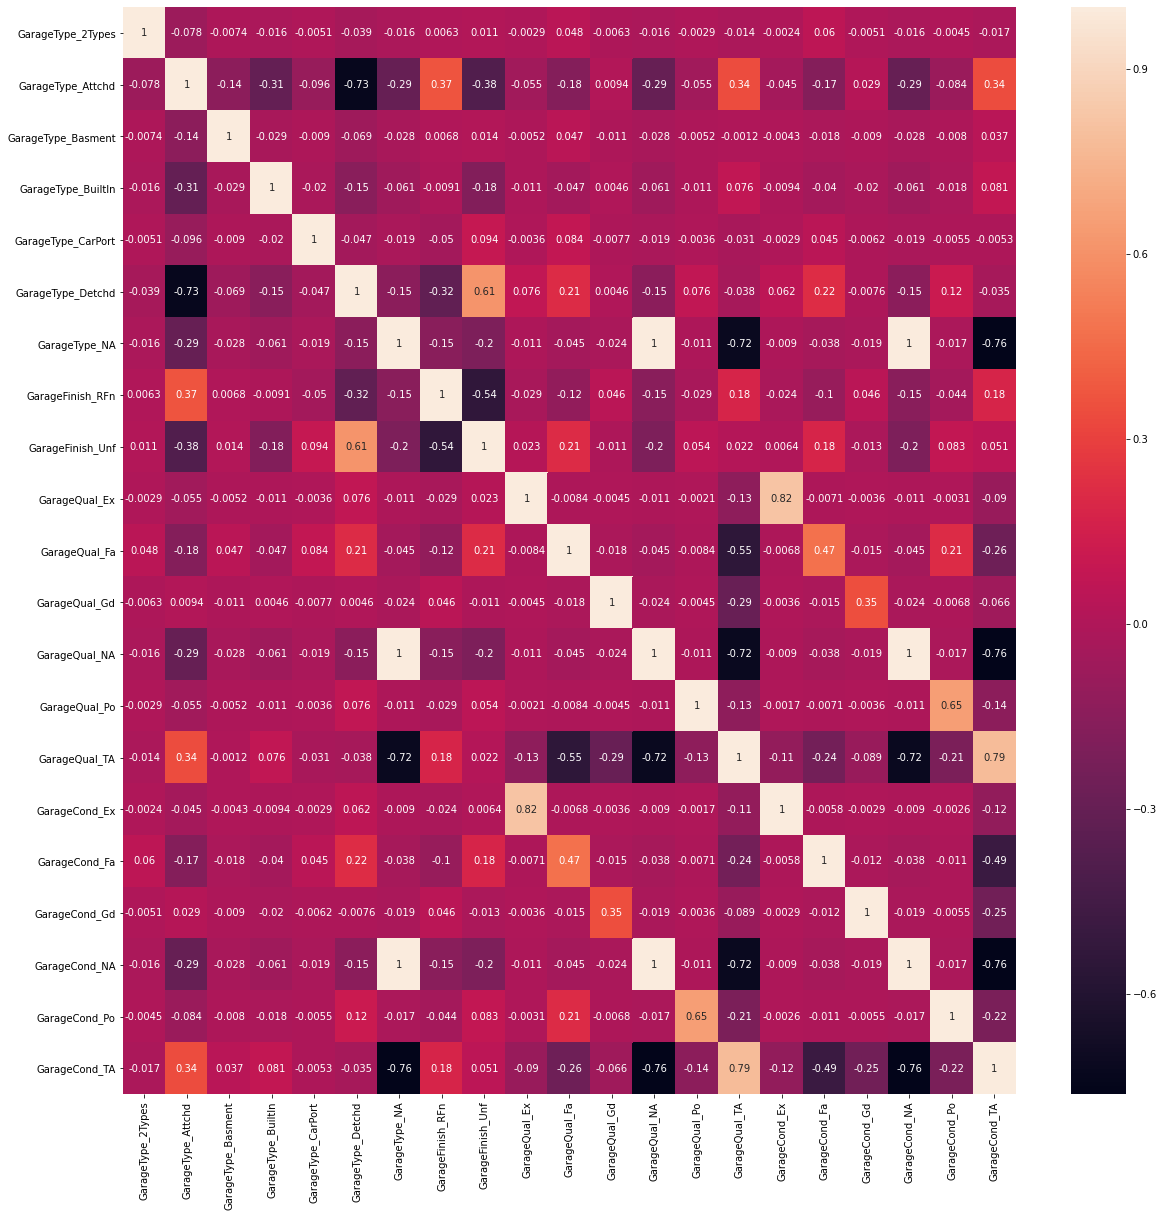

In [115]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap((train_dumm[['GarageType_2Types', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', \
           'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Ex', 'GarageQual_Fa', \
           'GarageQual_Gd', 'GarageQual_NA','GarageQual_Po','GarageQual_TA','GarageCond_Ex','GarageCond_Fa', 'GarageCond_Gd',\
            'GarageCond_NA','GarageCond_Po','GarageCond_TA']]).corr(), annot = True)

The location of the house, there is no strong correlation:

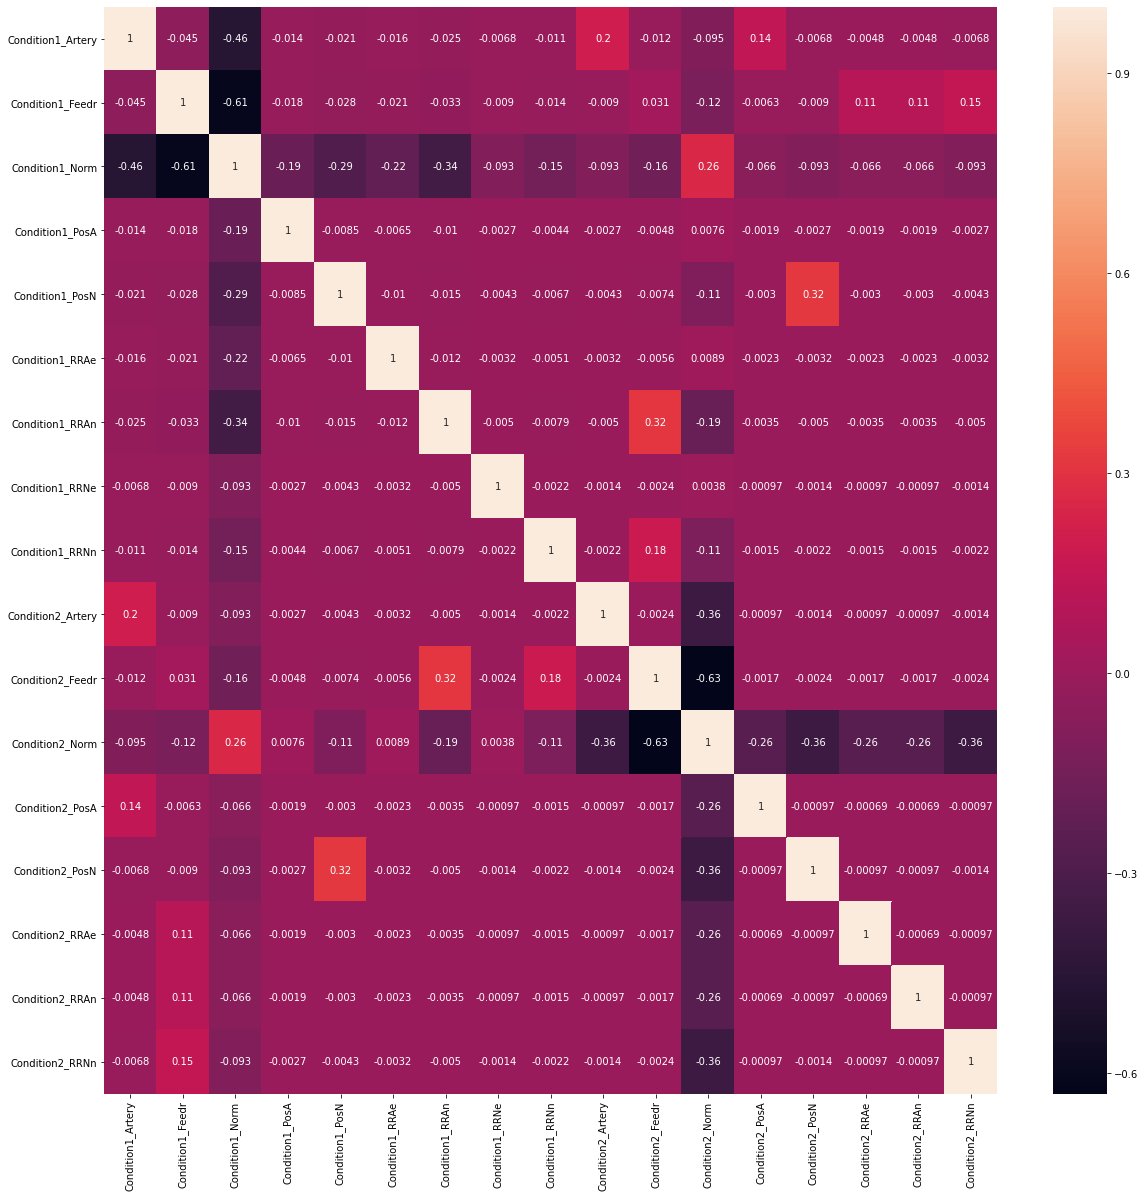

In [116]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap((train_dumm[['Condition1_Artery','Condition1_Feedr','Condition1_Norm','Condition1_PosA','Condition1_PosN', \
 'Condition1_RRAe','Condition1_RRAn','Condition1_RRNe','Condition1_RRNn','Condition2_Artery','Condition2_Feedr', \
'Condition2_Norm','Condition2_PosA','Condition2_PosN','Condition2_RRAe','Condition2_RRAn', \
'Condition2_RRNn']]).corr(), annot = True)

Condition of the house. No correlation:

In [117]:
train_dumm[['OverallQual', 'OverallCond']].corr()

,OverallQual,OverallCond
OverallQual,1.000000,-0.091932
OverallCond,-0.091932,1.000000


Characteristics of the basement. No strong correlations:

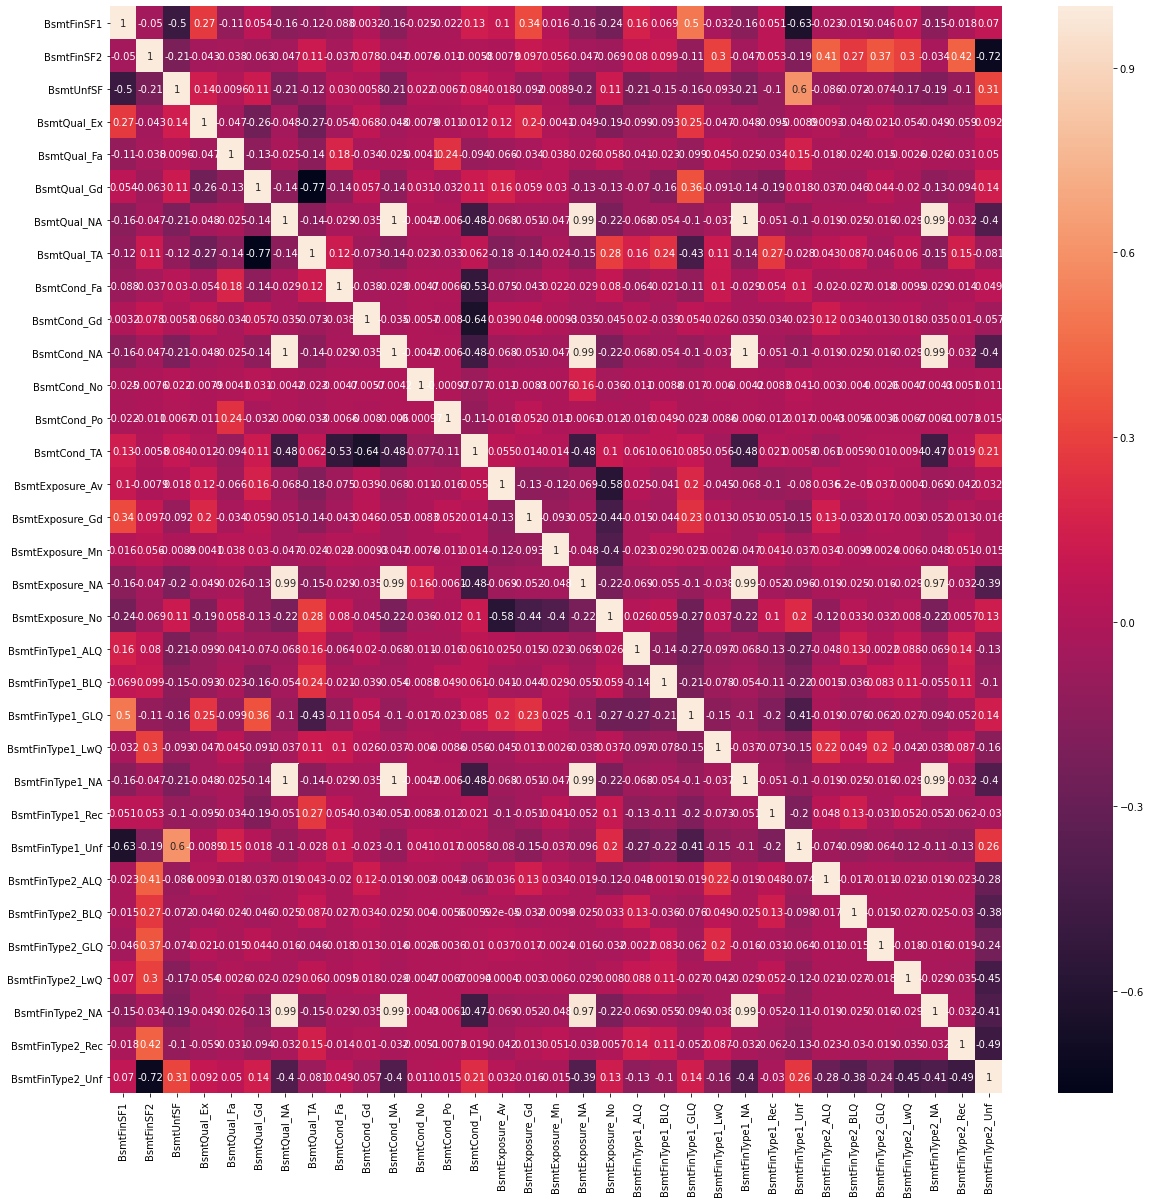

In [118]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap((train_dumm[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','BsmtQual_Ex','BsmtQual_Fa','BsmtQual_Gd','BsmtQual_NA', \
                         'BsmtQual_TA','BsmtCond_Fa','BsmtCond_Gd','BsmtCond_NA','BsmtCond_No','BsmtCond_Po','BsmtCond_TA', \
                         'BsmtExposure_Av','BsmtExposure_Gd','BsmtExposure_Mn','BsmtExposure_NA','BsmtExposure_No', \
                         'BsmtFinType1_ALQ','BsmtFinType1_BLQ','BsmtFinType1_GLQ','BsmtFinType1_LwQ','BsmtFinType1_NA', \
                         'BsmtFinType1_Rec','BsmtFinType1_Unf','BsmtFinType2_ALQ','BsmtFinType2_BLQ','BsmtFinType2_GLQ', \
                         'BsmtFinType2_LwQ','BsmtFinType2_NA','BsmtFinType2_Rec','BsmtFinType2_Unf']]).corr(), annot = True)

Fireplaces. There is a strong correlation between the number of fireplaces and the quality of "no fireplace". 0 fireplaces strongly correlates with the quality of "no fireplace".

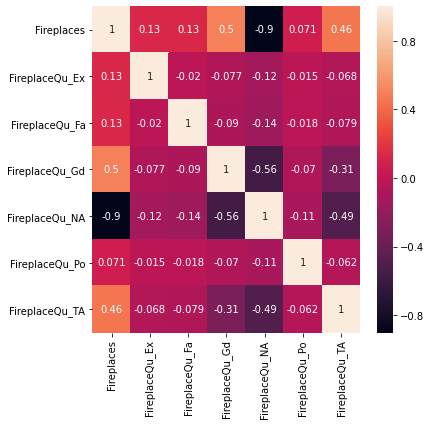

In [119]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap((train_dumm[['Fireplaces', 'FireplaceQu_Ex','FireplaceQu_Fa','FireplaceQu_Gd','FireplaceQu_NA','FireplaceQu_Po', \
                         'FireplaceQu_TA']]).corr(), annot = True)

Swimming pool. Similar to fireplaces:

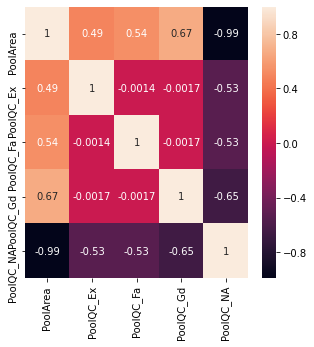

In [120]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap((train_dumm[['PoolArea','PoolQC_Ex','PoolQC_Fa','PoolQC_Gd','PoolQC_NA']]).corr(), annot = True)

There are no strongly pronounced features that can be excluded from the training model in case of high corretalions.

Let's try another method.

### Train-test split

Divide the dataset into a training and test in the proportion of 70/30:

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
train_dumm_y = train_dumm['SalePrice']

In [123]:
train_dumm_x = train_dumm.drop(['SalePrice', 'Id'], axis = 1)

In [124]:
x_train, x_test, y_train, y_test = train_test_split(train_dumm_x, train_dumm_y, test_size = 0.3, random_state = 10)

### Extra Tree Classifier.

Let's see the importance of attributes using extra tree classifier

In [125]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

In [126]:
model = ExtraTreesClassifier(n_estimators=100)

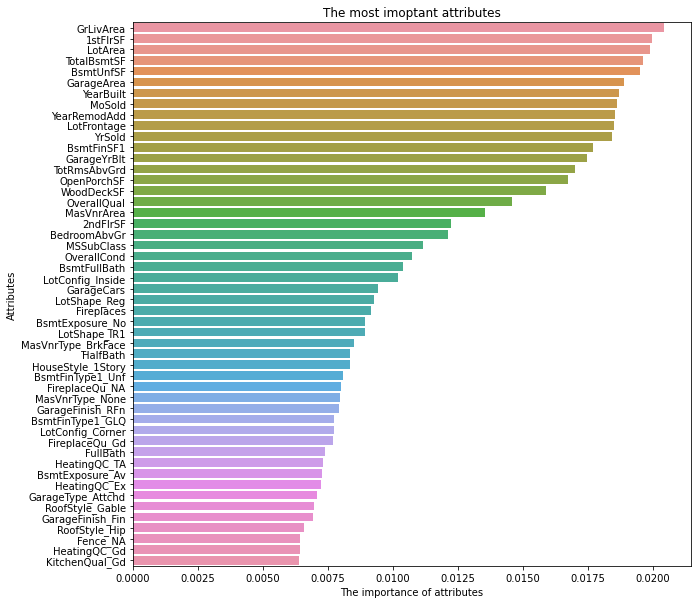

In [127]:
model.fit(x_train, y_train)
headers = list(x_train.columns.values)
feature_imp = pd.Series(model.feature_importances_, index = headers).sort_values(ascending=False).head(50)
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('The importance of attributes')
plt.ylabel('Attributes')
plt.title("The most imoptant attributes")
plt.show()

Top-20 attributes:

In [128]:
feature_imp.sort_values(ascending=False).head(20)

GrLivArea       0.020424
1stFlrSF        0.019952
LotArea         0.019879
TotalBsmtSF     0.019631
BsmtUnfSF       0.019491
GarageArea      0.018896
YearBuilt       0.018689
MoSold          0.018624
YearRemodAdd    0.018552
LotFrontage     0.018493
YrSold          0.018422
BsmtFinSF1      0.017682
GarageYrBlt     0.017471
TotRmsAbvGrd    0.017010
OpenPorchSF     0.016743
WoodDeckSF      0.015877
OverallQual     0.014566
MasVnrArea      0.013527
2ndFlrSF        0.012215
BedroomAbvGr    0.012112
dtype: float64

First, let's try to fit models without throwing out any features and check the quality.

## 7. Model fitting

I choosed 5 models for fitting:

* linear regression
* decision tree regressor
* random forest
* SVR
* light GBM

Also I tune models with GridSearchCV.

After all, I reduce the number of features and perform all actions again.

### Data normalization

In [129]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [130]:
x_test_std = scaler.fit_transform(x_test)
x_train_std = scaler.fit_transform(x_train)
y_test_std = scale(y_test)
y_train_std = scale(y_train)

#### 1. Linear Regression

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [131]:
LR = LinearRegression()

In [132]:
LR.fit(x_train_std, y_train_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Visualization:

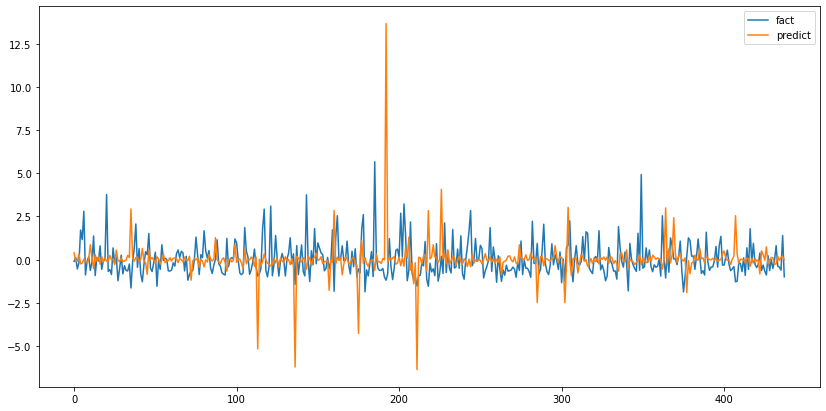

In [133]:
rcParams['figure.figsize'] = 14,7
plt.plot(y_test_std, label = 'fact')
plt.plot(scale(LR.predict(x_test_std)), label = 'predict')
plt.legend()

Evaluation on root mean squared error (ideally it should be 0):

In [134]:
sqrt(mean_squared_error(y_test_std, scale(LR.predict(x_test_std))))

1.4469965129815245

Use GridSearchCV for model tunning:

In [139]:
#from sklearn.model_selection import GridSearchCV

In [140]:
#LR_gr = LinearRegression()

In [141]:
#parameters = {'fit_intercept':[True, False], 'copy_X': [True, False], 'n_jobs':[None, 1, -1]}

In [142]:
#grid = GridSearchCV(LR_gr, parameters, scoring='neg_mean_squared_error')

In [1]:
#grid.fit(x_train_std, y_train_std)

The default settings are optimal:

In [144]:
#print ('best fit_intercept    = ', grid.best_estimator_.fit_intercept)
#print ('best copy_X           = ', grid.best_estimator_.copy_X)
#print ('best n_jobs           = ', grid.best_estimator_.n_jobs)

best fit_intercept    =  True
best copy_X           =  True
best n_jobs           =  None


#### 2. Decision Tree Regressor

In [293]:
from sklearn.tree import DecisionTreeRegressor

In [294]:
DTR = DecisionTreeRegressor(random_state = 10)

In [295]:
DTR.fit(x_train_std, y_train_std)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=10, splitter='best')

Visualization:

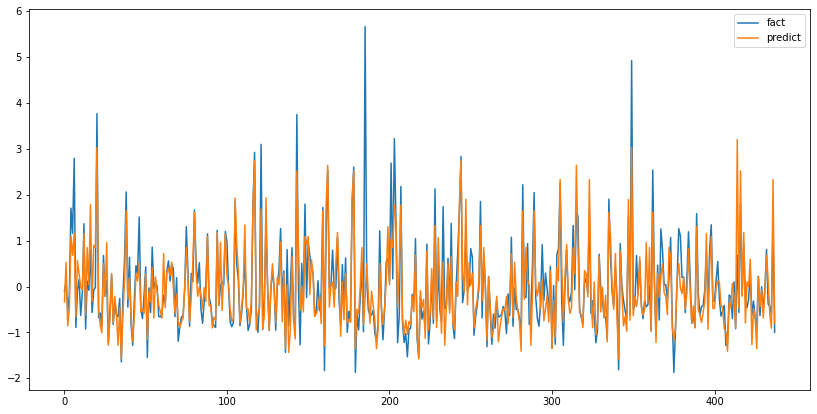

In [296]:
plt.plot(y_test_std, label = 'fact')
plt.plot(DTR.predict(x_test_std), label = 'predict')
plt.legend()

Evaluation on RMSE:

In [297]:
sqrt(mean_squared_error(y_test_std, DTR.predict(x_test_std)))

0.5429386971857806

Use GridSearchCV for model tuning:

In [150]:
#DTR_gr = DecisionTreeRegressor(random_state = 10)

In [151]:
#parameters = {'max_depth':[None, 10, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 
#              'min_samples_split': [2, 5, 10]}

In [152]:
#grid = GridSearchCV(DTR_gr, parameters, scoring='neg_mean_squared_error')

In [2]:
#grid.fit(x_train_std, y_train_std)

In [154]:
#print ('best max_depth           = ', grid.best_estimator_.max_depth)
#print ('best max_features        = ', grid.best_estimator_.max_features)
#print ('best min_saples_leaf     = ', grid.best_estimator_.min_samples_leaf)
#print ('best min_samples_split   = ', grid.best_estimator_.min_samples_split)

best max_depth           =  10
best max_features        =  auto
best min_saples_leaf     =  1
best min_samples_split   =  10


Use the received values:

In [155]:
DTR_gr = DecisionTreeRegressor(max_depth = 10, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 10, 
                               random_state = 10)

In [156]:
DTR_gr.fit(x_train_std, y_train_std)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=10, splitter='best')

Visualization:

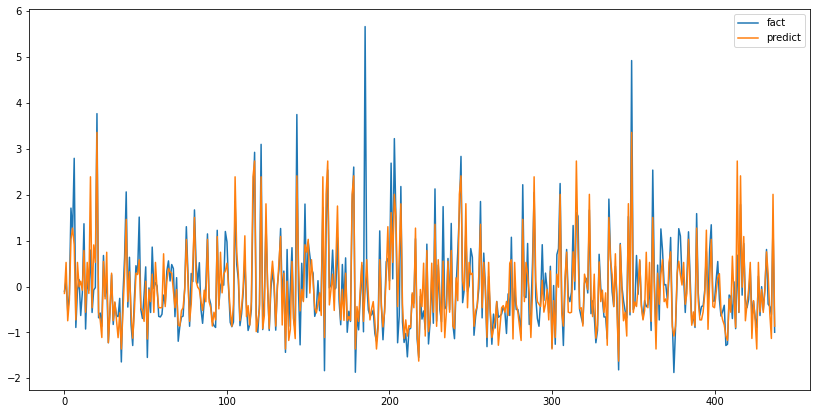

In [157]:
plt.plot(y_test_std, label = 'fact')
plt.plot(DTR_gr.predict(x_test_std), label = 'predict')
plt.legend()

Evaluation on RMSE:

In [158]:
print(sqrt(mean_squared_error(y_test_std, DTR_gr.predict(x_test_std))))

0.5208606379997052


#### 3. Random Forest Regressor

In [159]:
from sklearn.ensemble import RandomForestRegressor

In [160]:
RFR = RandomForestRegressor(random_state = 10)

In [161]:
RFR.fit(x_train_std, y_train_std)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=10, verbose=0,
                      warm_start=False)

Visualization:

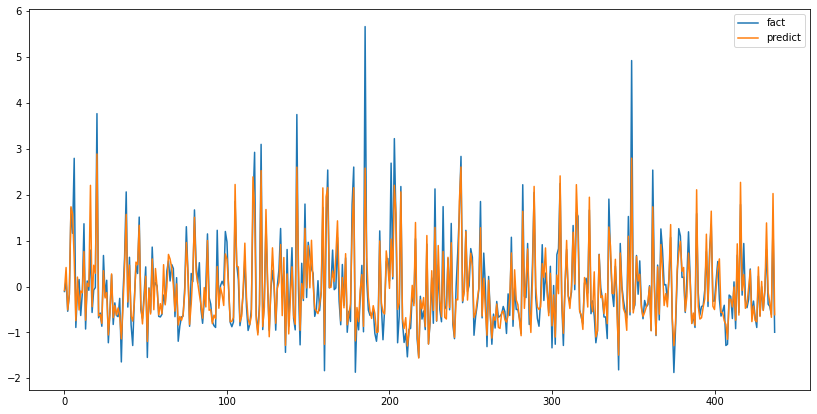

In [162]:
plt.plot(y_test_std, label = 'fact')
plt.plot(RFR.predict(x_test_std), label = 'predict')
plt.legend()

Evaluation on RMSE:

In [163]:
print(sqrt(mean_squared_error(y_test_std, RFR.predict(x_test_std))))

0.3920575265951414


Use GridSearchCV for model tuning:

In [164]:
#RFR_gr = RandomForestRegressor(random_state = 10)

In [165]:
#parameters = {'n_estimators':[10, 20, 50, 100, 200, 500, 1000], 'max_depth':[None, 10, 20, 50, 100], 'max_features': 
              ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]}

In [166]:
#grid = GridSearchCV(RFR_gr, parameters, scoring='neg_mean_squared_error')

In [3]:
#grid.fit(x_train_std, y_train_std)

In [168]:
#print ('best n_estimators        = ', grid.best_estimator_.n_estimators)
#print ('best max_depth           = ', grid.best_estimator_.max_depth)
#print ('best max_features        = ', grid.best_estimator_.max_features)
#print ('best min_saples_leaf     = ', grid.best_estimator_.min_samples_leaf)
#print ('best min_samples_split   = ', grid.best_estimator_.min_samples_split)

best n_estimators        =  500
best max_depth           =  20
best max_features        =  auto
best min_saples_leaf     =  1
best min_samples_split   =  10


Use the received values:

In [169]:
RFR_gr = RandomForestRegressor(n_estimators = 500, max_depth = 20, max_features = 'auto', 
                               min_samples_leaf = 1, min_samples_split = 10)

In [170]:
RFR_gr.fit(x_train_std, y_train_std)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Visualization:

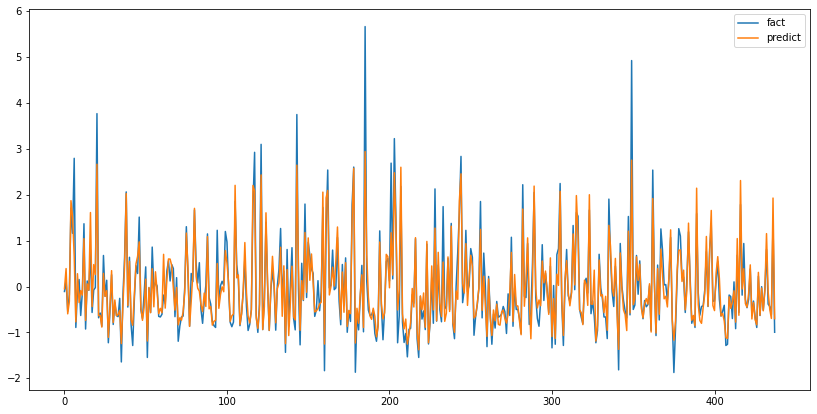

In [171]:
plt.plot(y_test_std, label = 'fact')
plt.plot(RFR_gr.predict(x_test_std), label = 'predict')
plt.legend()

Evaluation on RMSE:

In [172]:
print(sqrt(mean_squared_error(y_test_std, RFR_gr.predict(x_test_std))))

0.36263273168711935


#### 4. SVR

In [173]:
from sklearn.svm import SVR

In [174]:
SVR_res = SVR()

In [175]:
SVR_res.fit(x_train_std, y_train_std)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

Visualization:

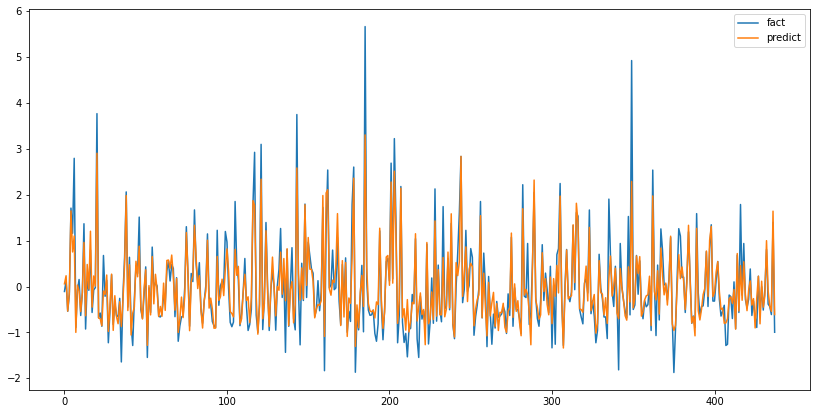

In [176]:
plt.plot(y_test_std, label = 'fact')
plt.plot(SVR_res.predict(x_test_std), label = 'predict')
plt.legend()

Evaluation on RMSE:

In [177]:
print(sqrt(mean_squared_error(y_test_std, SVR_res.predict(x_test_std))))

0.4027124706692304


Use GridSearchCV for model tuning:

In [178]:
#parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[0.5, 1, 2, 5, 10], 'gamma': 
#              [0.01, 0.05, 0.1, 0.2, 0.5]}

In [179]:
#grid = GridSearchCV(SVR_res, parameters, scoring='neg_mean_squared_error')

In [4]:
#grid.fit(x_train_std, y_train_std)

In [181]:
#print ('best kernel = ', grid.best_estimator_.kernel)
#print ('best C      = ', grid.best_estimator_.C)
#print ('best gamma  = ', grid.best_estimator_.gamma)

best kernel =  linear
best C      =  0.5
best gamma  =  0.01


Use the received values:

In [182]:
SVR_gr = SVR(kernel = 'linear', C = 0.5, gamma = 0.01)

In [183]:
SVR_gr.fit(x_train_std, y_train_std)

SVR(C=0.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Visualization:

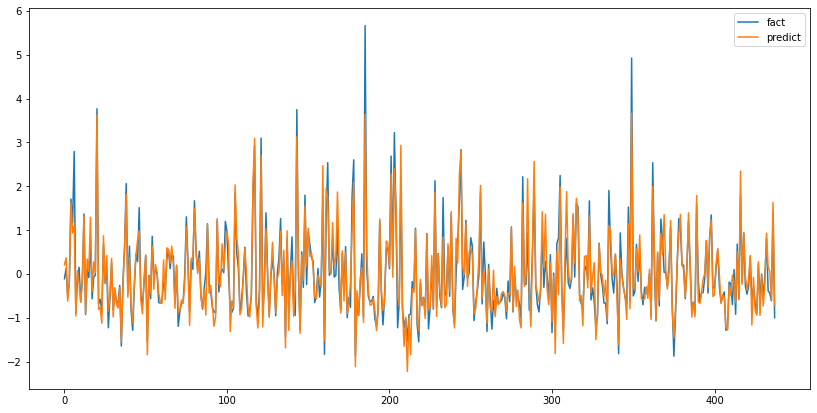

In [184]:
plt.plot(y_test_std, label = 'fact')
plt.plot(SVR_gr.predict(x_test_std), label = 'predict')
plt.legend()

Evaluation on RMSE:

In [185]:
print(sqrt(mean_squared_error(y_test_std, SVR_gr.predict(x_test_std))))

0.33939586802630556


#### 5. Light GBM

In [132]:
import lightgbm

In [148]:
lgbm_train = lightgbm.Dataset(x_train_std, label = y_train_std)

In [149]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['sub_feature'] = 0.4
params['min_data'] = 50
params['max_depth'] = 10

In [150]:
LGBM = lightgbm.train(params, lgbm_train)

Visualization:

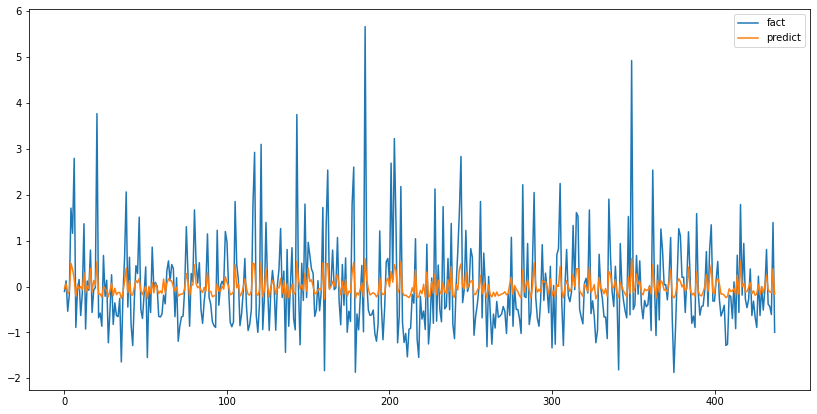

In [190]:
rcParams['figure.figsize'] = 14,7
plt.plot(y_test_std, label = 'fact')
plt.plot(LGBM.predict(x_test_std), label = 'predict')
plt.legend()

Evaluation on RMSE:

In [151]:
print(sqrt(mean_squared_error(y_test_std, LGBM.predict(x_test_std))))

0.8236757537921983


Use GridSearchCV for model tuning:

In [192]:
#parameters = {'boosting_type': ['gbdt', 'goss'], 'learning_rate': [0.001, 0.003, 0.01, 0.1], 
#          'sub_feature': [0.1, 0.2, 0.5, 1], 'min_data': [10, 20, 50, 100], 'max_depth': [10, 20, 50, 100]}

In [193]:
#grid =GridSearchCV(estimator = lightgbm.LGBMRegressor(boosting_type='gbdt', sub_feature=0.4, max_depth=10, learning_rate=0.03, 
#                                                       min_data = 50),
#                    param_grid = parameters, scoring='neg_mean_squared_error')

In [5]:
#grid.fit(x_train_std, y_train_std)

In [195]:
#print ('best boosting_type = ', grid.best_estimator_.boosting_type)
#print ('best learning_rate      = ', grid.best_estimator_.learning_rate)
#print ('best sub_feature  = ', grid.best_estimator_.sub_feature)
#print ('best min_data  = ', grid.best_estimator_.min_data)
#print ('best max_depth  = ', grid.best_estimator_.max_depth)

best boosting_type =  gbdt
best learning_rate      =  0.1
best sub_feature  =  0.5
best min_data  =  50
best max_depth  =  10


Use the received values:

In [133]:
lgbm_train_gr = lightgbm.Dataset(x_train_std, label = y_train_std)

In [134]:
parameters = {}
parameters['learning_rate'] = 0.1
parameters['boosting_type'] = 'gbdt'
parameters['sub_feature'] = 0.5
parameters['min_data'] = 50
parameters['max_depth'] = 10

In [135]:
LGBM_gr = lightgbm.train(parameters, lgbm_train_gr)

Visualization:

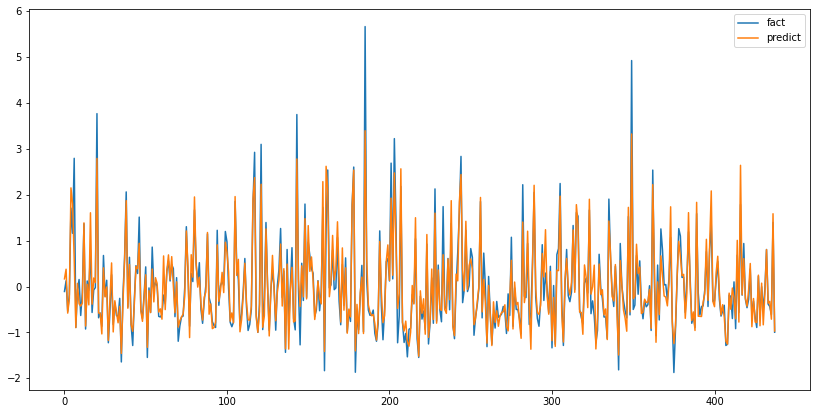

In [199]:
plt.plot(y_test_std, label = 'fact')
plt.plot(LGBM_gr.predict(x_test_std), label = 'predict')
plt.legend()

Evaluation on RMSE:

In [315]:
print(sqrt(mean_squared_error(y_test_std, LGBM_gr.predict(x_test_std))))

0.3384028657131133


### Fitting with feature selection

Previously, we selected 20 of the most important attributes, now try to use for training only them.

In [201]:
train_dumm_x_fs = train_dumm_x[['MoSold', 'BsmtUnfSF', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'LotArea', 
                                'LotFrontage', 'YrSold', 'BsmtFinSF1', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 
                                'OpenPorchSF','TotRmsAbvGrd','OverallQual','WoodDeckSF','MasVnrArea','2ndFlrSF','BedroomAbvGr']]

In [202]:
x_train_fs, x_test_fs, y_train_fs, y_test_fs = train_test_split(train_dumm_x_fs, train_dumm_y, test_size = 0.3, 
                                                                random_state = 10)

In [204]:
x_train_std_fs = scaler.fit_transform(x_train_fs)
x_test_std_fs = scaler.fit_transform(x_test_fs)
y_train_std_fs = scale(y_train_fs)
y_test_std_fs = scale(y_test_fs)

#### 1. Linear Regression

In [205]:
LR_fs = LinearRegression()

In [206]:
LR_fs.fit(x_train_std_fs, y_train_std_fs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Visualization:

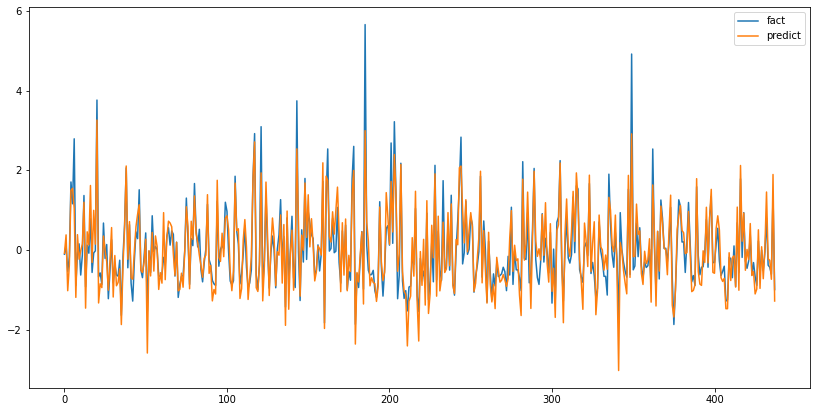

In [207]:
plt.plot(y_test_std_fs, label = 'fact')
plt.plot(scale(LR_fs.predict(x_test_std_fs)), label = 'predict')
plt.legend()

Evaluation on RMSE:

In [208]:
sqrt(mean_squared_error(LR_fs.predict(x_test_std_fs), y_test_std_fs))

0.422390692237344

Use GridSearchCV for model tuning:

In [209]:
#LR_gr_fs = LinearRegression()

In [210]:
#parameters = {'fit_intercept':[True, False], 'copy_X': [True, False], 'n_jobs':[None, 1, -1]}

In [211]:
#grid = GridSearchCV(LR_gr_fs, parameters, scoring = 'neg_mean_squared_error')

In [6]:
#grid.fit(x_train_std_fs, y_train_std_fs)

In [213]:
#print ('best fit_intercept = ', grid.best_estimator_.fit_intercept)
#print ('best copy_X      = ', grid.best_estimator_.copy_X)
#print ('best n_jobs  = ', grid.best_estimator_.n_jobs)

best fit_intercept =  False
best copy_X      =  True
best n_jobs  =  None


Use the received values:

In [214]:
LR_fs_gr = LinearRegression(fit_intercept = False, copy_X = False, n_jobs = None)

In [215]:
LR_fs_gr.fit(x_train_std_fs, y_train_std_fs)

LinearRegression(copy_X=False, fit_intercept=False, n_jobs=None,
                 normalize=False)

Visualization:

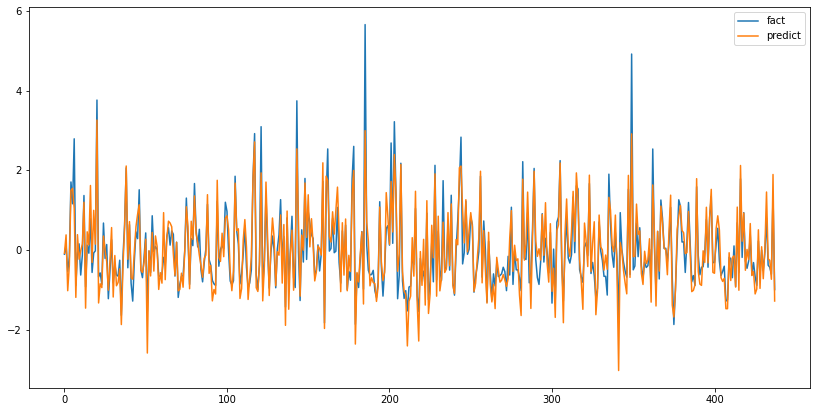

In [216]:
plt.plot(y_test_std_fs, label = 'fact')
plt.plot(scale(LR_fs_gr.predict(x_test_std_fs)), label = 'predict')
plt.legend()

Evaluation on RMSE:

In [217]:
sqrt(mean_squared_error(y_test_std_fs, scale(LR_fs_gr.predict(x_test_std_fs))))

0.4311572079996562

#### 2. Decision Tree Regressor

In [218]:
DTR_fs = DecisionTreeRegressor(random_state = 10)

In [219]:
DTR_fs.fit(x_train_std_fs, y_train_std_fs)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=10, splitter='best')

Visualization:

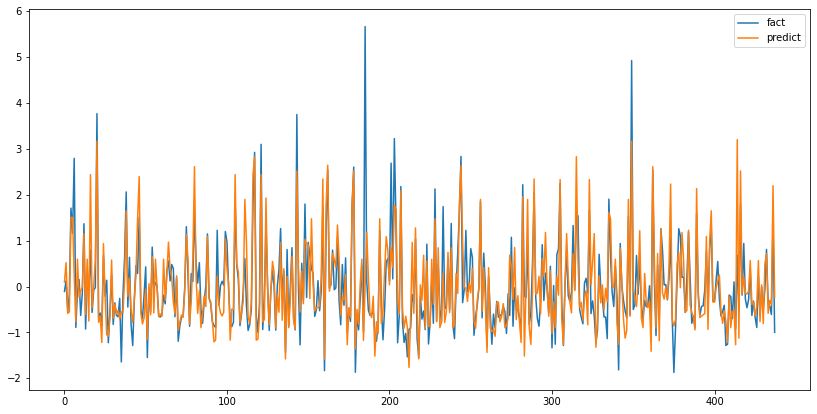

In [220]:
plt.plot(y_test_std_fs, label = 'fact')
plt.plot(DTR_fs.predict(x_test_std_fs), label = 'predict')
plt.legend()

Evaluation on RMSE:

In [221]:
sqrt(mean_squared_error(y_test_std_fs, DTR_fs.predict(x_test_std_fs)))

0.5933759051263968

Use GridSearchCV for model tuning:

In [222]:
#DTR_fs_gr = DecisionTreeRegressor(random_state=10)

In [223]:
#parameters = {'max_depth':[None, 10, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 
#              'min_samples_split': [2, 5, 10]}

In [224]:
#grid = GridSearchCV(DTR_fs_gr, parameters, scoring = 'neg_mean_squared_error')

In [7]:
#grid.fit(x_train_std_fs, y_train_std_fs)

In [226]:
#print ('best max_depth          = ', grid.best_estimator_.max_depth)
#print ('best max_features       = ', grid.best_estimator_.max_features)
#print ('best min_samples_leaf   = ', grid.best_estimator_.min_samples_leaf)
#print ('best min_samples_split  = ', grid.best_estimator_.min_samples_split)

best max_depth          =  10
best max_features       =  auto
best min_samples_leaf   =  2
best min_samples_split  =  10


Use the received values:

In [227]:
DTR_fs_gr = DecisionTreeRegressor(max_depth = 10, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 10)

In [228]:
DTR_fs_gr.fit(x_train_std_fs, y_train_std_fs)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Visualization:

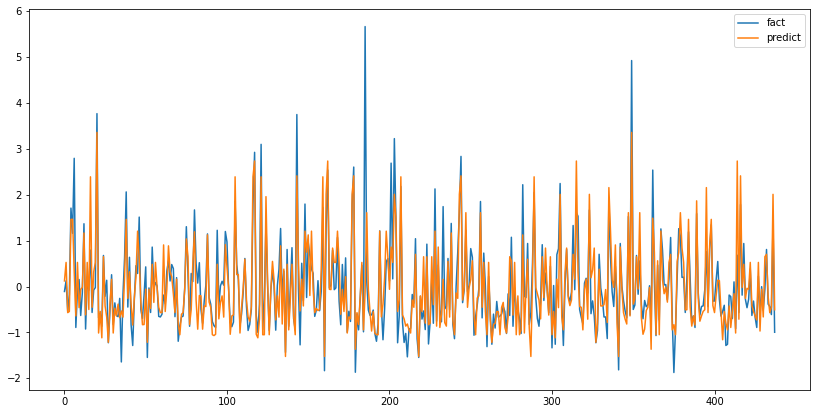

In [229]:
plt.plot(y_test_std_fs, label = 'fact')
plt.plot(DTR_fs_gr.predict(x_test_std_fs), label = 'predict')
plt.legend()

Evaluation on RMSE:

In [230]:
sqrt(mean_squared_error(y_test_std_fs, DTR_fs_gr.predict(x_test_std_fs)))

0.5548907860853887

#### 3. Random Forest Regressor

In [231]:
RFR_fs = RandomForestRegressor(random_state = 10)

In [232]:
RFR_fs.fit(x_train_std_fs, y_train_std_fs)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=10, verbose=0,
                      warm_start=False)

Visualization:

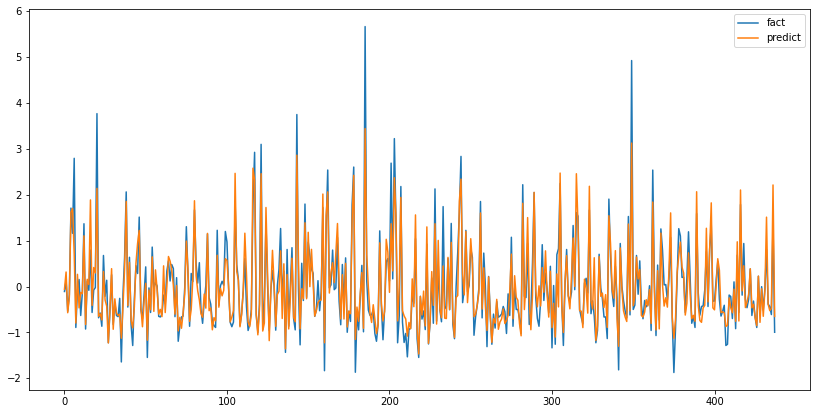

In [233]:
plt.plot(y_test_std_fs, label = 'fact')
plt.plot(RFR_fs.predict(x_test_std_fs), label = 'predict')
plt.legend()

Evaluation on RMSE:

In [234]:
sqrt(mean_squared_error(y_test_std_fs, RFR_fs.predict(x_test_std_fs)))

0.38578198068150654

Use GridSearchCV for model tuning:

In [235]:
#RFR_fs_gr = RandomForestRegressor(random_state = 10)

In [236]:
#parameters = {'n_estimators':[10, 20, 50, 100, 200, 500, 1000], 'max_depth':[None, 10, 20, 50, 100], 'max_features': 
              ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]}

In [237]:
#grid = GridSearchCV(RFR_fs_gr, parameters, scoring = 'neg_mean_squared_error')

In [8]:
#grid.fit(x_train_std_fs, y_train_std_fs)

In [239]:
#print ('best n_estimators      = ', grid.best_estimator_.n_estimators)
#print ('best max_depth         = ', grid.best_estimator_.max_depth)
#print ('best max_features      = ', grid.best_estimator_.max_features)
#print ('best min_samples_leaf  = ', grid.best_estimator_.min_samples_leaf)
#print ('best min_samples_split = ', grid.best_estimator_.min_samples_split)

best n_estimators      =  200
best max_depth         =  20
best max_features      =  sqrt
best min_samples_leaf  =  1
best min_samples_split =  5


Use the received values:

In [240]:
RFR_fs_gr = RandomForestRegressor(n_estimators = 200, max_depth = 20, max_features = 'sqrt', min_samples_leaf = 1,
                                  min_samples_split = 5, random_state = 10)

In [241]:
RFR_fs_gr.fit(x_train_std_fs, y_train_std_fs)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=10, verbose=0,
                      warm_start=False)

Visualization:

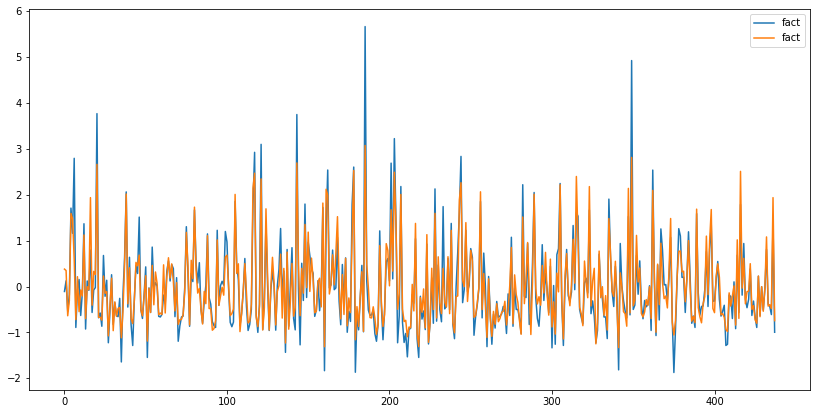

In [242]:
plt.plot(y_test_std_fs, label = 'fact')
plt.plot(RFR_fs_gr.predict(x_test_std_fs), label = 'fact')
plt.legend()

Evaluation on RMSE:

In [243]:
sqrt(mean_squared_error(y_test_std_fs, RFR_fs_gr.predict(x_test_std_fs)))

0.36925616513918014

#### 4. SVR

In [244]:
SVR_fs = SVR()

In [245]:
SVR_fs.fit(x_train_std_fs, y_train_std_fs)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

Visualization:

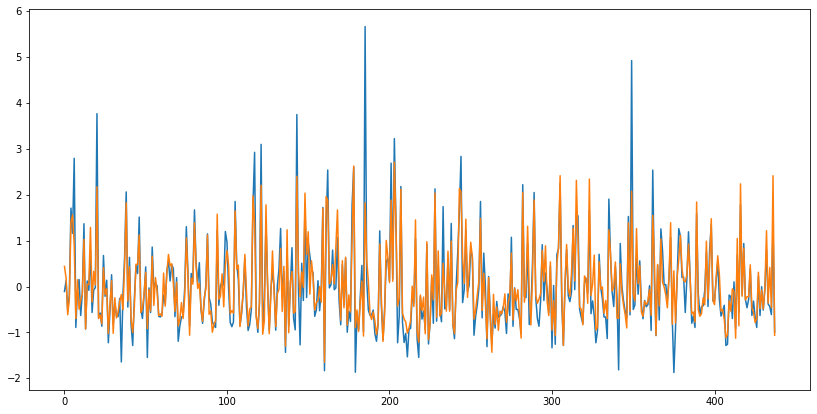

In [246]:
plt.plot(y_test_std_fs, label = 'fact')
plt.plot(SVR_fs.predict(x_test_std_fs))

Evaluation on RMSE:

In [247]:
sqrt(mean_squared_error(y_test_std_fs, SVR_fs.predict(x_test_std_fs)))

0.44092361196267077

Use GridSearchCV for model tuning:

In [248]:
#SVR_fs_gr = SVR()

In [249]:
#parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[0.5, 1, 2, 5, 10], 'gamma': 
#              [0.01, 0.05, 0.1, 0.2, 0.5]}

In [250]:
#grid = GridSearchCV(SVR_fs_gr, parameters, scoring = 'neg_mean_squared_error')

In [9]:
#grid.fit(x_train_std_fs, y_train_std_fs)

In [252]:
#print ('best kernel = ', grid.best_estimator_.kernel)
#print ('best C      = ', grid.best_estimator_.C)
#print ('best gamma  =' , grid.best_estimator_.gamma)

best kernel =  rbf
best C      =  2
best gamma  = 0.01


Use the received values:

In [253]:
SVR_fs_gr = SVR(kernel = 'rbf', C = 2, gamma = 0.01)

In [254]:
SVR_fs_gr.fit(x_train_std_fs, y_train_std_fs)

SVR(C=2, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Visualization:

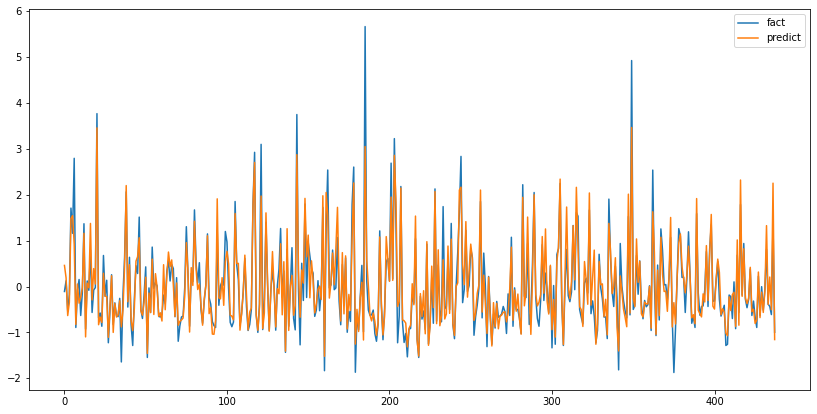

In [255]:
plt.plot(y_test_std_fs, label = 'fact')
plt.plot(SVR_fs_gr.predict(x_test_std_fs), label = 'predict')
plt.legend()

Evaluation on RMSE:

In [256]:
sqrt(mean_squared_error(y_test_std_fs, SVR_fs_gr.predict(x_test_std_fs)))

0.3666422803091494

#### 5. Light GBM

In [257]:
lightgbm_train_fs = lightgbm.Dataset(x_train_std_fs, label = y_train_std_fs)

In [258]:
parameters = {}
parameters['learning_rate'] = 0.003
parameters['boosting_type'] = 'gbdt'
parameters['sub_feature'] = 0.4
parameters['min_data'] = 50
parameters['max_depth'] = 10

In [259]:
LGBM_fs = lightgbm.train(parameters, lightgbm_train_fs)

Visualization:

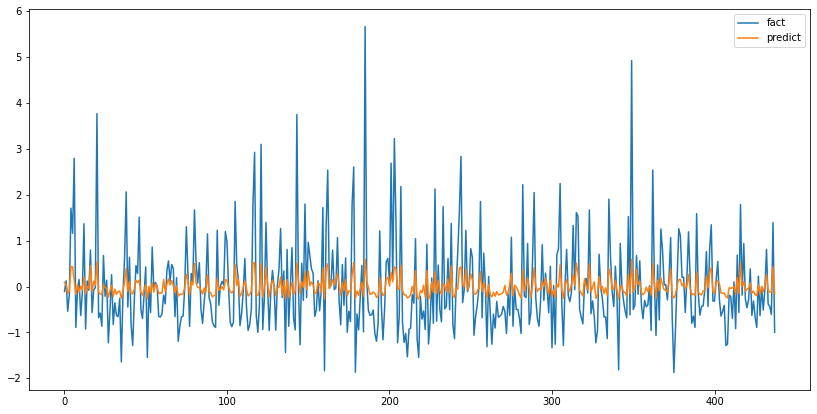

In [260]:
plt.plot(y_test_std_fs, label = 'fact')
plt.plot(LGBM_fs.predict(x_test_std_fs), label = 'predict')
plt.legend()

Evaluation on RMSE:

In [261]:
sqrt(mean_squared_error(y_test_std_fs, LGBM_fs.predict(x_test_std_fs)))

0.8265656417207777

Use GridSearchCV for model tuning:

In [262]:
#parameters = {'boosting_type': ['gbdt', 'goss'], 'learning_rate': [0.001, 0.003, 0.01, 0.1], 
#          'sub_feature': [0.1, 0.2, 0.5, 1], 'min_data': [10, 20, 50, 100], 'max_depth': [10, 20, 50, 100]}

In [263]:
#grid= GridSearchCV(estimator = lightgbm.LGBMRegressor(boosting_type='gbdt', sub_feature=0.4, max_depth=10, learning_rate=0.03, 
#                                                       min_data = 50),
#                    param_grid = parameters, scoring='neg_mean_squared_error')

In [10]:
#grid.fit(x_train_std_fs, y_train_std_fs)

In [265]:
#print ('best boosting type = ', grid.best_estimator_.boosting_type)
#print ('best learning rate = ', grid.best_estimator_.learning_rate)
#print ('best sub_feature   = ', grid.best_estimator_.sub_feature)
#print ('best min_data      = ', grid.best_estimator_.min_data)
#print ('best max_depth     = ', grid.best_estimator_.max_depth)

best boosting type =  gbdt
best learning rate =  0.1
best sub_feature   =  0.5
best min_data      =  50
best max_depth     =  10


Use the received values:

In [266]:
parameters = {}
parameters['learning_rate'] = 0.1
parameters['boosting_type'] = 'gbdt'
parameters['sub_feature'] = 0.5
parameters['min_data'] = 50
parameters['max_depth'] = 10

In [267]:
LGBM_fs_gr = lightgbm.train(parameters, lightgbm_train_fs)

Visualization:

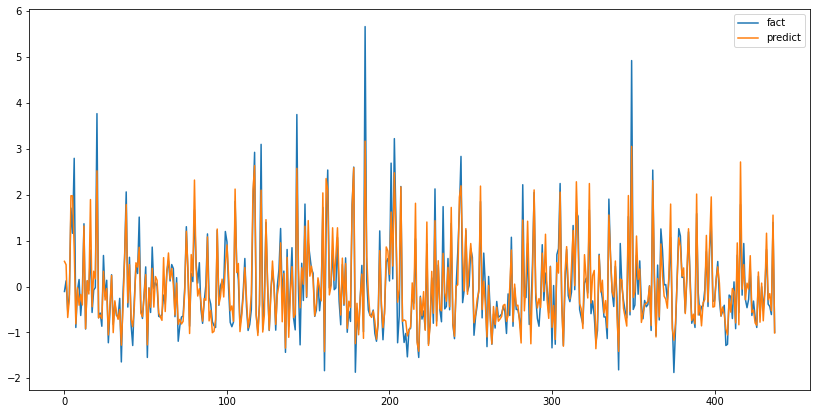

In [268]:
plt.plot(y_test_std_fs, label = 'fact')
plt.plot(LGBM_fs_gr.predict(x_test_std_fs), label = 'predict')
plt.legend()

Evaluation on RMSE:

In [269]:
sqrt(mean_squared_error(y_test_std_fs, LGBM_fs_gr.predict(x_test_std_fs)))

0.37543504480338463

## 8. Models quality assessment

According to the task, the success of the model is evaluated by the mean squared error metric

In [270]:
res = {'Model':['Linear Regression', 'Decision Tree Regressor', 'Decisiont Tree Regressor tuned', 'Random Forest Regressor',
                'Random Forest Regressor tuned', 'SVR',
                'SVR tuned', 'Light GBM', 'Light GBM tuned', 
                'Linear Regression feature selected', 'Linear Regression feature selected tuned',
               'Decision Tree Regressor feature selected', 'Decision Tree Regressor feature selected tuned',
                'Random Forest Regressor feature selected', 'Random Forest Regressor feature selected tuned',
                'SVR feature selected', 'SVR feature selected tuned', 'Light GBM feature selected',
               'Light GBM feature selected tuned'], 'RMSE':
                  [sqrt(mean_squared_error(y_test_std, scale(LR.predict(x_test_std)))),
                  sqrt(mean_squared_error(y_test_std, DTR.predict(x_test_std))),
                  sqrt(mean_squared_error(y_test_std, DTR_gr.predict(x_test_std))),
                  sqrt(mean_squared_error(y_test_std, RFR.predict(x_test_std))),
                  sqrt(mean_squared_error(y_test_std, RFR_gr.predict(x_test_std))),
                  sqrt(mean_squared_error(y_test_std, SVR_res.predict(x_test_std))),
                  sqrt(mean_squared_error(y_test_std, SVR_gr.predict(x_test_std))),
                  sqrt(mean_squared_error(y_test_std, LGBM.predict(x_test_std))),
                  sqrt(mean_squared_error(y_test_std, LGBM_gr.predict(x_test_std))),
                  sqrt(mean_squared_error(y_test_std_fs, scale(LR_fs.predict(x_test_std_fs)))),
                  sqrt(mean_squared_error(y_test_std_fs, scale(LR_fs_gr.predict(x_test_std_fs)))),
                  sqrt(mean_squared_error(y_test_std_fs, DTR_fs.predict(x_test_std_fs))),
                  sqrt(mean_squared_error(y_test_std_fs, DTR_fs_gr.predict(x_test_std_fs))),
                  sqrt(mean_squared_error(y_test_std_fs, RFR_fs.predict(x_test_std_fs))),
                  sqrt(mean_squared_error(y_test_std_fs, RFR_fs_gr.predict(x_test_std_fs))),
                  sqrt(mean_squared_error(y_test_std_fs, SVR_fs.predict(x_test_std_fs))),
                  sqrt(mean_squared_error(y_test_std_fs, SVR_fs_gr.predict(x_test_std_fs))),
                  sqrt(mean_squared_error(y_test_std_fs, LGBM_fs.predict(x_test_std_fs))),
                  sqrt(mean_squared_error(y_test_std_fs, LGBM_fs_gr.predict(x_test_std_fs)))]}

In [271]:
quality = pd.DataFrame(res)

The best result was shown by LGBM tuned model so choose it to predict sale price for test dataset.

In [272]:
quality.sort_values('RMSE')

,Model,RMSE
8,Light GBM tuned,0.338403
6,SVR tuned,0.339396
4,Random Forest Regressor tuned,0.362633
16,SVR feature selected tuned,0.366642
14,Random Forest Regressor feature selected tuned,0.369256
18,Light GBM feature selected tuned,0.375435
13,Random Forest Regressor feature selected,0.385782
3,Random Forest Regressor,0.392058
5,SVR,0.402712
10,Linear Regression feature selected tuned,0.431157


## 9. Submission

Delete ID column:

In [136]:
test_dumm2 = test_dumm.drop(['Id'], axis = 1)

### Normalization

In [137]:
test_dumm_std = scaler.fit_transform(test_dumm2)

### Model fitting

In [138]:
result = LGBM_gr.predict(test_dumm_std)

### Inverse transform

In [140]:
y_scaler = scaler.fit(y_train.values.reshape(-1, 1))
result_inv = y_scaler.inverse_transform(result)

In [141]:
inv = pd.DataFrame(result_inv)

### Result

In [142]:
pd_res = test_dumm.join(inv)

In [147]:
pd_res = pd_res.rename(columns = {0 : 'SalePrice'})[['Id', 'SalePrice']]

In [153]:
pd_res.head()

,Id,SalePrice
0,1461,117167.567187
1,1462,154836.324880
2,1463,173644.106707
3,1464,175280.997608
4,1465,185531.087011


In [162]:
pd_res.to_csv('submission.csv', index = False)